In [1]:
#Isa Gaillard
#Assignment 3
#Date: 4/13/2020
#Title: Manipulating Environmental Justice Databases

For my project, I am building on data and notebooks that I have spent time using within a course I am GSI'ing in the Environmental Science and Policy Management (ESPM) Department. Within these notebooks, I have used data from the website of the Office of Environmental Health Hazard Assessment (OEHHA). The data comes from an online mapping tool called CalEnviroScreen or CES for short. I will use data from CES 1.1 (2012), CES 2.0 (2014), and CES 3.0 (2018) to assess changes over time, across geographies, and other demographic variables. CES includes environmental pollution and population data across different geographies throughout California. CES 1.1 includes data at the zip code level, while 2.0 and 3.0 provide data at the census tract level. In order to analyze the data, I will import the three different versions of CES to my Jupyter notebook as csv files within a Data folder. I will then use the different versions of CES to create a dataframe. I will also use code that was provided in the ESPM notebook in order to clean the data and run certain functions in separate "Data Cleaning" notebooks.

In [2]:
import datascience as ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm


In [3]:
pwd

'/home/jovyan/cp255/Assignment-2'

Using the cleaned data that I have stored in my Assignment-2 Data folder, I will now begin to assess the three different versions of CES, creating a unique table for each. I will do this as preparation to begin analyzing how different variables have changed over time. 

In [4]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces1_1_data.csv')
print (df)

        zip  total_pop  ces_1_1_score ces_1_1_score_percentile_range    ozone  \
0     93706      41087          66.30       96-100% (highest scores)  0.17731   
1     93307      82658          63.44       96-100% (highest scores)  0.51234   
2     95205      38069          61.60       96-100% (highest scores)  0.02279   
3     93702      48607          59.83       96-100% (highest scores)  0.31783   
4     90058       3223          59.08       96-100% (highest scores)  0.01561   
5     95203      15696          58.75       96-100% (highest scores)  0.02221   
6     95206      65004          58.40       96-100% (highest scores)  0.02532   
7     93725      24979          57.65       96-100% (highest scores)  0.20456   
8     92408      15271          57.01       96-100% (highest scores)  0.81296   
9     90220      49328          56.10       96-100% (highest scores)  0.00000   
10    90023      45903          56.04       96-100% (highest scores)  0.02100   
11    92335      95397      

In [5]:
ces1_1_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces1_1_data.csv')
ces1_1_data.take(np.arange(0,50))

zip,total_pop,ces_1_1_score,ces_1_1_score_percentile_range,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,age,age_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,population_characteristic_score,population_characteristic
93706,41087,66.3,96-100% (highest scores),0.17731,76.55,15.61,95.96,6.14,56.19,1120.3,90.59,1.96273e+06,86.14,388.7,37.64,195,97.58,301,93.43,4.825,84.99,0,0,12,84.91,73.4,7.3,28.43,76.46,132.4,98.95,9.1,95.94,47.6,94.22,16.9,79.82,70.6,96.91,9,90.4
93307,82658,63.44,96-100% (highest scores),0.51234,93.7,19.4,99.69,9.57,64.73,7128.7,98.37,78149,59.59,710.3,52.05,104,92.39,202,88.83,10.1,94.64,0,0,20,95.69,76.9,7.7,26.93,63.71,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,8.2,82.5
95205,38069,61.6,96-100% (highest scores),0.02279,38.53,12.51,71.65,18.95,80.5,94.2,72.24,4.77328e+06,90.28,1352.2,72.67,96,91.62,325,94.11,9.6,94.22,6,63.87,5,53.97,73.5,7.4,27.72,71.26,73.3,90.71,6.95,60.92,47.9,94.4,23.7,89.37,68.6,96.23,8.4,83.8
93702,48607,59.83,96-100% (highest scores),0.31783,86.99,16.08,97.06,36.85,94.91,7.92,53.79,40129,53.76,1070.1,65.38,56,82.8,73,65.47,1.275,48.13,0,0,2,28.97,66.4,6.6,27.62,70.8,93.5,95.32,8.4,91.26,55.4,97.38,22.4,87.97,73.5,97.72,9,90.1
90058,3223,59.08,96-100% (highest scores),0.01561,31.32,15.26,94.98,56.8,98.36,0,0,3.0458e+07,97.54,923.7,59.97,415,99.83,178,86.73,58.775,100,7,71.67,34,99.22,71.9,7.2,25.01,43.2,57.2,80.8,7.34,72,69.6,99.7,37.9,97.69,90.5,99.88,8.2,82.2
95203,15696,58.75,96-100% (highest scores),0.02221,37.78,12.31,70.36,17.52,78.69,12.8,58.31,5.51085e+06,90.93,1328.5,72.15,179,96.89,1154,99.39,2.975,73.71,16,95.73,14,88.1,74.7,7.5,25.48,48.46,103.9,96.86,7.93,85.26,33.9,86.43,12.4,69.11,53.9,85.62,7.9,78.6
95206,65004,58.4,96-100% (highest scores),0.02532,40.1,11.92,66.5,8.23,61.79,252.3,79.83,1.10022e+07,93.65,711.7,52.11,163,96.28,434,96.68,8.05,92.53,21,98.83,34,99.22,74.8,7.5,26,53.66,86.17,93.97,7.08,65.6,38.2,89.41,18.4,83.2,51.1,82.65,7.8,78.1
93725,24979,57.65,96-100% (highest scores),0.20456,78.71,16.02,96.75,9.6,64.84,1351.9,91.83,135622,65.8,580.9,46.01,160,95.94,312,93.77,13.1,96.97,0,0,33,98.79,74.9,7.5,27.4,68.17,69.59,89.35,6.35,40.25,43.3,91.97,16.4,78.58,62.5,93.46,7.7,77
92408,15271,57.01,96-100% (highest scores),0.81296,98.26,14.01,83.28,22.65,84.68,0.346,29.88,576964,78.5,1725.2,80.92,91,90.75,110,75.08,5.95,88.87,1,14.5,24,97.41,75.2,7.5,23.19,22.74,73.255,90.65,8.11,87.68,31.5,83.51,18.5,83.36,55.4,87.22,7.6,75.9
90220,49328,56.1,96-100% (highest scores),0,0,14.6,88.43,27.27,89.09,17.9,60.61,3.23845e+06,88.6,1106.1,66.17,44,75.37,191,87.95,19.25,98.87,6,63.87,15,90,70.7,7.1,25.44,48,91.89,94.89,8.41,91.42,38.6,89.53,11.7,66.89,53.8,85.37,7.9,79.4


In [6]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces2_data.csv')
print (df)

      census_tract  total_pop        ca_county    zip             city  \
0       6019001100       3174          Fresno   93706           Fresno   
1       6019000200       3167          Fresno   93706           Fresno   
2       6019001500       2206          Fresno   93725           Fresno   
3       6019000600       6161          Fresno   93721           Fresno   
4       6071001600       6133   San Bernardino  91761          Ontario   
5       6019000902       5252          Fresno   93706           Fresno   
6       6019000502       3606          Fresno   93701           Fresno   
7       6019000901       3151          Fresno   93706           Fresno   
8       6037206050       2146      Los Angeles  90023      Los Angeles   
9       6019007100       7904          Fresno   93662            Selma   
10      6019001000       4106          Fresno   93706           Fresno   
11      6037432801       2568      Los Angeles  91731         El Monte   
12      6019000501       2815         

In [7]:
ces2_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces2_data.csv')
ces2_data.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,city,longitude,latitude,ces_2_score,ces_2_percentile_range,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,age,age_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,population_characteristic_score_percentile
6019001100,3174,Fresno,93706,Fresno,-119.782,36.7097,89.22,96-100% (highest scores),0.255228,80.87,14.7461,97.83,44.23,93.91,519.882,83.3,5.47014,53.9,96414.5,99.81,1217.54,66.95,85.5,98.86,55.75,85.47,0.52,74.84,0,0,5,81.49,78.6211,9.53097,99.95,26.4,67.66,130.749,99.03,0.0580253,94.73,55.2,nan,83.66,77.5009,97.78,19.3,92.05,99.6,9.36066
6019000200,3167,Fresno,93706,Fresno,-119.806,36.7355,83.47,96-100% (highest scores),0.304446,84.4,14.5547,97.47,46.91,94.8,519.882,83.3,11.6964,60.54,11826.7,95.53,1012.28,59.69,21.25,84.41,49.75,83.07,0.21,56.85,0,0,0,0,72.4086,8.77791,99.54,27.5,76.31,132.321,99.11,0.0628638,99.29,52.1,nan,74.04,86.8284,99.66,25.27,98.14,99.8,9.50896
6019001500,2206,Fresno,93725,Fresno,-119.718,36.6816,83.08,96-100% (highest scores),0.225687,78.25,14.9376,98.06,15.66,54.75,753.541,98.37,2105.76,93.82,5846.92,87.54,785.58,45.43,51,96.05,100.5,93.72,12.76,99.48,0,0,22.2,99.29,78.9994,9.5768,99.96,27.9,78.76,69.5331,87.18,0.0525352,69.29,46.4,nan,80.68,62.7461,88.32,18.3,89.6,97.74,8.67497
6019000600,6161,Fresno,93721,Fresno,-119.793,36.7431,82.95,96-100% (highest scores),0.327935,85.81,14.5064,97.33,57.64,97.57,519.882,83.3,568.113,87.65,7158.2,90.58,838.784,49.37,4.95,43.88,26,66.8,0.27,62.35,0,0,0,0,71.3804,8.65317,99.32,29,84.47,116.9,97.94,0.062997,99.34,45.9,nan,75.49,88.681,99.79,26.69,98.61,99.89,9.58659
6071001600,6133,San Bernardino,91761,Ontario,-117.618,34.0578,80.7,96-100% (highest scores),0.465401,92.5,13.8882,96.19,47.08,94.83,604.312,90.34,1.36334,42.11,8122.69,91.87,1232.87,67.41,56.2,96.58,49,82.87,1.845,91.31,5,55.5,2,58.45,80.8004,9.79513,99.99,23.9,39.98,44.9096,60.66,0.0638952,99.56,60,nan,84.03,66.5397,91.46,15.71,81.57,94.58,8.2388
6019000902,5252,Fresno,93706,Fresno,-119.804,36.7178,80.05,96-100% (highest scores),0.269893,81.91,14.6732,97.73,40.93,92.38,519.882,83.3,29.7708,68.02,32996.7,98.88,352.832,14.1,12.1,69.11,6.5,27.03,0.02,8.91,0,0,4.25,76.9,66.0301,8.00461,97.37,29.8,87.69,132.4,99.19,0.0617052,98.72,57.1,nan,92.83,81.2126,98.95,32.71,99.72,100,10
6019000502,3606,Fresno,93701,Fresno,-119.782,36.7444,78.84,96-100% (highest scores),0.335804,86.22,14.4963,97.31,59.02,97.66,519.882,83.3,1376.85,91.96,4214.25,80.71,1467.88,73.02,0,0,0,0,0.1,39.19,0,0,0,0,66.2913,8.03625,97.59,29.2,85.4,116.326,97.88,0.059459,96.75,56.6,nan,88.74,74.4305,96.49,28.8,99.24,99.99,9.81003
6019000901,3151,Fresno,93706,Fresno,-119.804,36.7105,77.86,96-100% (highest scores),0.258082,81.06,14.7188,97.78,41.04,92.54,519.882,83.3,64.1853,73.5,22802.3,98.12,415.384,17.54,14.2,74.66,18,55.59,0,0,0,0,3.5,71.76,67.8777,8.22863,98.34,31.3,91.97,132.4,99.19,0.0572989,93.17,48,nan,72.35,76.216,97.29,19.22,91.92,99.76,9.4623
6037206050,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,77.8,96-100% (highest scores),0.020888,40.66,12.6967,87.03,86.29,99.27,458.041,74.57,0,0,4981.3,84.13,4181.54,97.23,34.3,92.16,39.7,78.13,7.52,98.68,7,71.63,12.6,95.86,73.8023,8.94678,99.76,36.8,97.75,56.5714,77,0.0493251,31.26,45.4,nan,98.07,67.5301,92.32,32.16,99.67,97.86,8.69606
6019007100,7904,Fresno,93662,Selma,-119.628,36.563,76.84,96-100% (highest scores),0.2353

Note that there is an error in the last few variables in the ces2 table above. An error occured during the data cleaning process that I will seek support to resolve at a later time. Fortunately, those variables are of little importance for the analyses and visualizations I hope to do for this assignment.

In [8]:
df = pd.read_csv(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces3_data.csv')
print (df)

      census_tract  total_pop       ca_county      zip        nearby_city  \
0     6.019001e+09       3174         Fresno   93706.0             Fresno   
1     6.071002e+09       6133  San Bernardino  91761.0            Ontario   
2     6.019000e+09       3167         Fresno   93706.0             Fresno   
3     6.077001e+09       6692     San Joaquin  95203.0           Stockton   
4     6.019002e+09       2206         Fresno   93725.0             Fresno   
5     6.037205e+09       2598     Los Angeles  90023.0        Los Angeles   
6     6.077000e+09       2396     San Joaquin  95203.0           Stockton   
7     6.019001e+09       4106         Fresno   93706.0             Fresno   
8     6.037206e+09       2146     Los Angeles  90023.0        Los Angeles   
9     6.019000e+09       6343         Fresno   93721.0             Fresno   
10    6.099002e+09       4165     Stanislaus   95354.0            Modesto   
11    6.029002e+09       9122           Kern   93307.0        Bakersfield   

In [9]:
ces3_data = ds.Table.read_table(r'/home/jovyan/cp255/Assignment-2/Data/cleaned_ces3_data.csv')
ces3_data.take(np.arange(0,50))

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6.019e+09,3174,Fresno,93706,Fresno,-119.782,36.7097,94.09,nan,nan,Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,nan,9.55,99.7
6.071e+09,6133,San Bernardino,91761,Ontario,-117.618,34.0578,90.68,nan,nan,Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,nan,9.07,98.11
6.019e+09,3167,Fresno,93706,Fresno,-119.806,36.7355,85.97,nan,nan,Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,nan,9.81,99.99
6.077e+09,6692,San Joaquin,95203,Stockton,-121.315,37.9405,82.49,nan,nan,Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,nan,8.99,97.72
6.019e+09,2206,Fresno,93725,Fresno,-119.718,36.6816,82.03,nan,nan,Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,nan,8.3,92.76
6.0372e+09,2598,Los Angeles,90023,Los Angeles,-118.197,34.0175,80.73,nan,nan,Yes,0.046,53.02,12.89,92.89,56.52,96.98,714.48,83.49,0,0,39040.2,99.3,2943.44,97.19,36.7,93.14,25,77.29,4.93,96.31,7,71.61,3.85,65.67,76.73,9.45,99.88,68.74,77.63,7.35,93.21,10.4,77.62,53.1,95.67,23.7,89.15,66.4,90.23,11.6,67.42,22,67.03,nan,8.54,94.89
6.077e+09,2396,San Joaquin,95203,Stockton,-121.302,37.9524,80.18,nan,nan,Yes,0.046,53.02,13.44,94,21.76,66.48,278.76,29.11,172.49,79.19,707.536,56.11,885.52,61.94,89.7,98.89,149.05,98.74,0.135,50.68,14,94.41,2.3,52.98,68.27,8.41,98.07,169.56,99.36,8.36,97.86,12.7,91.68,46,91.72,27.1,92.4,76.2,97.03,14.4,82,24.3,74.73,nan,9.53,99.65
6.019e+09,4106,Fresno,93706,Fresno,-119.804,36.6978,80.13,nan,nan,Yes,0.065,98.18,15.4,97.22,20.848,64.14,788.02,89.12,1435.93,90.89,6996.96,88.06,243.54,7.97,15.45,77.6,20,71.07,0,0,0,0,10,89.46,66.88,8.24,97.35,142.28,98.42,7.83,95.91,14.96,97.67,47.4,92.58,15.8,76.58,74.5,95.9,20,95.49,31.8,90.72,nan,9.73,99.91
6.03721e+09,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,79.03,nan,nan,Yes,0.046,53.02,12.89,92.89,53.958,96.42,664.07,78.57,0,0,10378.2,94.06,2810.82,96.63,36.05,92.96,16.25,63.8,10.025,99.13,7,71.61,22.1,98.02,77.09,9.5,99.9,58.03,66.53,6.71,87.5,7.24,40.56,50.4,94.36,35.7,97.12,75.7,96.64,28.5,99.

At this point I have added each of the three versions of CES to this notebook as separate tables. 

In [10]:
ces3_data

census_tract,total_pop,ca_county,zip,nearby_city,longitude,latitude,ces_3_score,ces_3_percentile,ces_3_percentile_range,sb_535_disadvantaged_community,ozone,ozone_percentile,pm_2.5,pm_2.5_percentile,diesel,diesel_percentile,drinking_water,drinking_water_percentile,pesticides,pesticides_percentile,toxic_releases,toxic_releases_percentile,traffic,traffic_percentile,cleanup_sites,cleanup_sites_percentile,groundwater_threats,groundwater_threats_percentile,hazardous_waste,hazardous_waste_percentile,impaired_water_bodies,impaired_water_bodies_percentile,solid_waste,solid_waste_percentile,pollution_burden,pollution_burden_score,pollution_burden_percentile,asthma,asthma_percentile,low_birth_weight,low_birth_weight_percentile,cardiovascular_disease,cardiovascular_disease_percentile,education,education_percentile,linguistic_isolation,linguistic_isolation_percentile,poverty,poverty_percentile,unemployment,unemployment_percentile,housing_burden,housing_burden_percentile,population_characteristic,population_characteristic_score,population_characteristic_score_percentile
6.019e+09,3174,Fresno,93706,Fresno,-119.782,36.7097,94.09,nan,nan,Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,nan,9.55,99.7
6.071e+09,6133,San Bernardino,91761,Ontario,-117.618,34.0578,90.68,nan,nan,Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,nan,9.07,98.11
6.019e+09,3167,Fresno,93706,Fresno,-119.806,36.7355,85.97,nan,nan,Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,nan,9.81,99.99
6.077e+09,6692,San Joaquin,95203,Stockton,-121.315,37.9405,82.49,nan,nan,Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,nan,8.99,97.72
6.019e+09,2206,Fresno,93725,Fresno,-119.718,36.6816,82.03,nan,nan,Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,nan,8.3,92.76
6.0372e+09,2598,Los Angeles,90023,Los Angeles,-118.197,34.0175,80.73,nan,nan,Yes,0.046,53.02,12.89,92.89,56.52,96.98,714.48,83.49,0,0,39040.2,99.3,2943.44,97.19,36.7,93.14,25,77.29,4.93,96.31,7,71.61,3.85,65.67,76.73,9.45,99.88,68.74,77.63,7.35,93.21,10.4,77.62,53.1,95.67,23.7,89.15,66.4,90.23,11.6,67.42,22,67.03,nan,8.54,94.89
6.077e+09,2396,San Joaquin,95203,Stockton,-121.302,37.9524,80.18,nan,nan,Yes,0.046,53.02,13.44,94,21.76,66.48,278.76,29.11,172.49,79.19,707.536,56.11,885.52,61.94,89.7,98.89,149.05,98.74,0.135,50.68,14,94.41,2.3,52.98,68.27,8.41,98.07,169.56,99.36,8.36,97.86,12.7,91.68,46,91.72,27.1,92.4,76.2,97.03,14.4,82,24.3,74.73,nan,9.53,99.65
6.019e+09,4106,Fresno,93706,Fresno,-119.804,36.6978,80.13,nan,nan,Yes,0.065,98.18,15.4,97.22,20.848,64.14,788.02,89.12,1435.93,90.89,6996.96,88.06,243.54,7.97,15.45,77.6,20,71.07,0,0,0,0,10,89.46,66.88,8.24,97.35,142.28,98.42,7.83,95.91,14.96,97.67,47.4,92.58,15.8,76.58,74.5,95.9,20,95.49,31.8,90.72,nan,9.73,99.91
6.03721e+09,2146,Los Angeles,90023,Los Angeles,-118.224,34.0299,79.03,nan,nan,Yes,0.046,53.02,12.89,92.89,53.958,96.42,664.07,78.57,0,0,10378.2,94.06,2810.82,96.63,36.05,92.96,16.25,63.8,10.025,99.13,7,71.61,22.1,98.02,77.09,9.5,99.9,58.03,66.53,6.71,87.5,7.24,40.56,50.4,94.36,35.7,97.12,75.7,96.64,28.5,99.

Below, I will run a few regressions to determine the correlation coefficient - r between variables of interest in the dataset. Note that some of the code in the cell directly below comes from one of the notebooks in my ESPM class. 

In [ ]:
def standard_units(xyz): #helps us define the correlation function
    return (xyz - np.mean(xyz))/np.std(xyz) 

#Finds the correlation between two columns of a table
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

In [ ]:
correlation(ces3_data, 'ozone', 'asthma')

In [ ]:
correlation(ces3_data, 'pm_2.5', 'asthma')

In [ ]:
correlation(ces3_data, 'diesel', 'asthma')

In [ ]:
correlation(ces3_data, 'toxic_releases', 'asthma')

In [ ]:
correlation(ces3_data, 'traffic', 'asthma')

In [ ]:
correlation(ces3_data, 'pollution_burden_score', 'asthma')

In [ ]:
correlation(ces3_data, 'ces_3_score', 'asthma')

In [ ]:
correlation(ces3_data, 'ozone', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'pm_2.5', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'diesel', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'toxic_releases', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'traffic', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'pollution_burden_score', 'cardiovascular_disease')

In [ ]:
correlation(ces3_data, 'ces_3_score', 'cardiovascular_disease')

A few of the interesting findings that emerged from the regression analysis: 1) the cumulative measure of pollution and social factors: "ces_3_score" has the strongest positive relationship with the ashtma and cardiovascular disease variables. 2) In terms of individual variables, diesel is the best predictor of asthma and ozone has a relatively strong and positive relationship with cardiovascular disease. 3) Surprisingly, toxic releases and traffic have a slightly negative and very weak relationship with the health variables. 

Now I will use code from one of my ESPM notebooks to conduct simple linear regression. I will analyze the relationships between pollution variables and health outcomes across the three different CES tables. 

In [25]:
def standard_units(xyz): #ignore this function!
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.

def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used in slope!
    return r*np.std(table.column(label_y))/np.std(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.mean(table.column(label_y)) - slope(table, label_x, label_y)*np.mean(table.column(label_x))

In [26]:
slope_of_reg_line = slope(ces1_1_data, "diesel", "asthma")
slope_of_reg_line

0.3625256107614194

In [27]:
intercept_of_reg_line = intercept(ces1_1_data, "diesel", "asthma")
intercept_of_reg_line

37.715272623957624

Now I have the slope (m) and the interceipt (b) of the the regression line. Given the values I just calculated above, I can write the equation of the regression line:

y = .36 * x + 37.72

Now that I have the regression line, I can plot it on a scatter plot to visualize the prediction line on top of the actual data. (Some of the below code comes from my ESPM class)

In [28]:
# defining the equation in Python!
y = lambda x: slope_of_reg_line*x+intercept_of_reg_line 

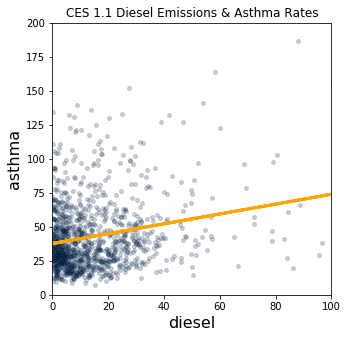

In [29]:
ces1_1_data.scatter("diesel", "asthma", alpha = .20, s = 15) #normal scatter plot
plots.plot(ces1_1_data.column('diesel'), y(ces1_1_data.column('diesel')), c = 'orange', lw = 3) #drawing the regression line
plots.title("CES 1.1 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

The gold line above is the equation of the line I derived: <span style='color: orange'>$Y = 0.36*X + 37.72$</span>. This line created by the equation in yellow is the **best** linear predictor of the data. With this data, I can begin to make predictions about how many asthma incidents a census tract will report based on the amount of diesel on and off-road emissions it has. For example, a census tract that reported diesel emissions of 60kg/day would most likely report about 60 cases of asthma per 10,000 population. While a census tract with diesel emissions of about 20kg/day would most likely report 45 cases of astham per 10,000 population.

Conveniently, the `.scatter()` function has a setting that allows me to draw the regression line within the scatterplot (without doing any calculations): all I do is to specify `fit_line = True`. Run the cell below and compare it to the plot above.

In [ ]:
ces1_1_data.scatter("diesel", "asthma", fit_line=True, alpha = .30, s = 20)
plots.title("CES 1.1 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

Now I will run the analysis for CES 2.0.

In [ ]:
slope_of_reg_line = slope(ces2_data, "diesel", "asthma")
slope_of_reg_line

In [ ]:
intercept_of_reg_line = intercept(ces2_data, "diesel", "asthma")
intercept_of_reg_line

In [ ]:
ces2_data.scatter("diesel", "asthma", alpha = .20, s = 15)
plots.plot(ces2_data.column('diesel'), y(ces2_data.column('diesel')), c = 'orange', lw = 3)
plots.title("CES 2.0 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

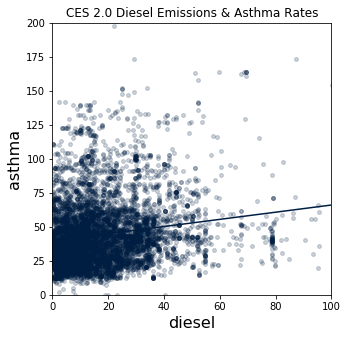

In [30]:
ces2_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("CES 2.0 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

QUESTION Resolved: as can be seen in the plot above. I was able to incorporate Meiqing's advice and change the range of the plot axes. 

Analysis for CES 3.0

In [ ]:
slope_of_reg_line = slope(ces3_data, "diesel", "asthma")
slope_of_reg_line

In [ ]:
intercept_of_reg_line = intercept(ces3_data, "diesel", "asthma")
intercept_of_reg_line

In [ ]:
ces3_data.scatter("diesel", "asthma", alpha = .20, s = 15)
plots.plot(ces3_data.column('diesel'), y(ces3_data.column('diesel')), c = 'orange', lw = 3)
plots.title("CES 3.0 Diesel Emissions & Asthma"), plots.xlim(0,100), plots.ylim(0,200);

In [ ]:
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("CES 3.0 Diesel Emissions & Asthma Rates"), plots.xlim(0,100), plots.ylim(0,200);

Below I will run code in order to calculate the coefficient of determiniation (R-Squared) for the variables of interest from CES 3.0. 

In [ ]:
print('r: ', correlation(ces3_data, 'diesel', 'asthma'))
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .18, s = 10)
plots.title("CES 3.0 Diesel Emissions & Asthma Rates");

In [ ]:
print('r-squared: ', correlation(ces3_data, 'diesel', 'asthma')**2)
ces3_data.scatter("diesel", "asthma", fit_line=True, alpha = .20, s = 15)
plots.title("CES 3.0 Diesel Emissions & Asthma Rates");

**correlation coefficient:**

As we would assume, diesel is correlated with asthma. But `r = 0.036` is a weak relationship.

Now I will run the cell below to find the value of r-squared for the above plot.

In [ ]:
model = sm.ols(formula='asthma ~ diesel', data = ces3_data)
fit = model.fit()
fit.summary()

`R-squared = 0.036`. This very low r-squared means that the above model analyzing the relationship between diesel and asthma is not a good predictor of asthma. However, I will return to R-squared later on when I conduct multiple regression in order develop more accurate models that take into account cumulative measures of pollution and negative health outcomes.


Below I will conduct regression analysis using CES 3.0 Score and Asthma from CES 3.0. Since CES 3.0 Score takes into account all of the variables in the data table, it is another effective way to understand the cummulative effects of pollution and socioecomomic factors on negative health outcomes.

In [ ]:
print('r: ', correlation(ces3_data, 'ces_3_score', 'asthma'))
ces3_data.scatter("ces_3_score", "asthma", fit_line=True, alpha = .2, s = 15)
plots.title("CES 3.0 Score & Asthma");

In [ ]:
model = sm.ols(formula='asthma ~ ces_3_score', data = ces3_data)
fit = model.fit()
fit.summary()

The r-squared here = .297 which still is not very strong but is substantially stronger than using the diesel variable alone. 

Below I will conduct multiple regression using a number of variables to determine the cummulative impacts of environmental pollution and socioeconomic factors on cardiovascular disease. Again, some of the code is from my ESPM class notebook.

In [ ]:
#this line makes the plot below interactive. We can move the graph around to see from different angles.
%matplotlib notebook

model = sm.ols(formula='cardiovascular_disease ~ ozone + diesel', data = ces3_data)
fit = model.fit()

fig = plots.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 20)                # generate a mesh
y_surf = np.arange(0, 100, 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'ozone': y_surf.ravel(), 'diesel': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.15)

ax.scatter(ces3_data['ozone'], ces3_data['diesel'], ces3_data['cardiovascular_disease'],
           c='blue',
           marker='o',
           alpha=.15)

ax.set_xlabel('ozone')
ax.set_ylabel('diesel')
ax.set_zlabel('cardiovascular_disease')
ax.set_title('Effect of Census Ozone and Diesel on Cardiovascular Disease')

plots.show()

QUESTION: I believe the above plot has the potential to show a more interesting relationship between these variables but I'm not sure how to manipulate the code to improve it. 

In [ ]:
fit.summary()

Much of my new analysis for assignment 3 begins below. Although I did make modifications to some of the code above. 

In [ ]:
ces3_data

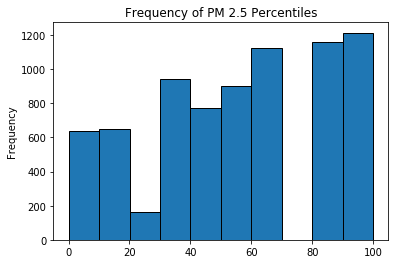

In [16]:
df['pm_2.5_percentile'].plot.hist()
plots.title("Frequency of PM 2.5 Percentiles");

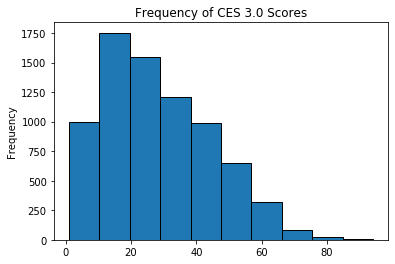

In [17]:
df['ces_3_score'].plot.hist()
plots.title("Frequency of CES 3.0 Scores");

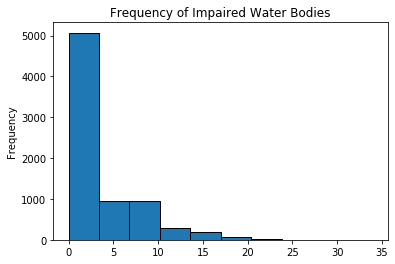

In [18]:
df['impaired_water_bodies'].plot.hist()
plots.title("Frequency of Impaired Water Bodies");

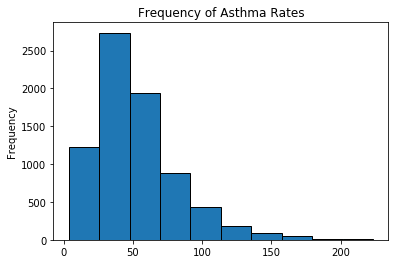

In [19]:
df['asthma'].plot.hist()
plots.title("Frequency of Asthma Rates");

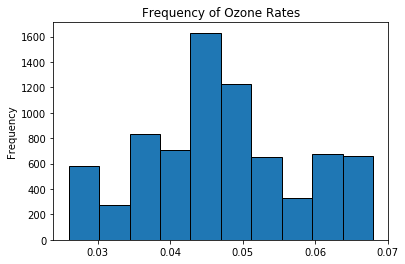

In [20]:
df['ozone'].plot.hist()
plots.title("Frequency of Ozone Rates");

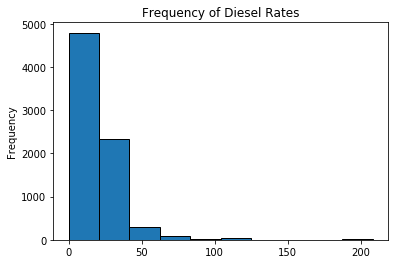

In [21]:
df['diesel'].plot.hist()
plots.title("Frequency of Diesel Rates");

In [31]:
df['sb_535_disadvantaged_commmunity'].plot.hist()
plots.title("Frequency of SB 535 DAC");

KeyError: 'sb_535_disadvantaged_commmunity'

Conclusion: My immediate next steps are to learn how to and begin conducting analysis at the census tract and zip code level, especially where environmental justice policies were put into place in years between when the CES data was gathered. As before, there will be limitations to this analysis, so finding out how to overcome this if possible or at least effectively respond to limitations will be vital. Below, I have listed a few questions I hope to get direct feedback on. If it would be easier to discuss answers to these questions via a zoom office hour meeting or phone call I am open to that and will reach out to set up an appointment soon. 